In [7]:
import kgeo as kg
import numpy as np
import matplotlib.pyplot as plt
from kgeo.off_eq import *
from kgeo.image import *

In [8]:
#define parameters
INC = 1*np.pi/180. #image inclination
ROUT = 100000. #4.e10 # sgra distance in M
NPTS = 500 #number of points in row on image
NGEO = 250 #number of points per geodesic (for guessing before root-finder)
SPIN = 0.1 #dimensionless spin
neqmax=2. #maximum number of equatorial crossings from observer to source
psitarget = 2. #single fieldline to ray-trace
model = 'para' #'para' for paraboloid otherwise monopole

In [9]:
#initialize grid
alphas = np.linspace(-10,10,NPTS)
betas = np.linspace(-10,10,NPTS)
agrid, bgrid = np.meshgrid(alphas, betas)

In [ ]:
#ray-tracing
ivec, qvec, uvec, evpavec = kg.off_eq.getstokes(psitarget, agrid, bgrid, ROUT, INC, SPIN, NGEO, do_phi_and_t = True, model=model, neqmax=neqmax, outgeo=None)

In [11]:
#make image
im_direct = makeim(ivec[0], qvec[0], uvec[0], agrid)
im_secondary = makeim(ivec[1], qvec[1], uvec[1], agrid)
im_total = makeim(ivec[-1], qvec[-1], uvec[-1], agrid)

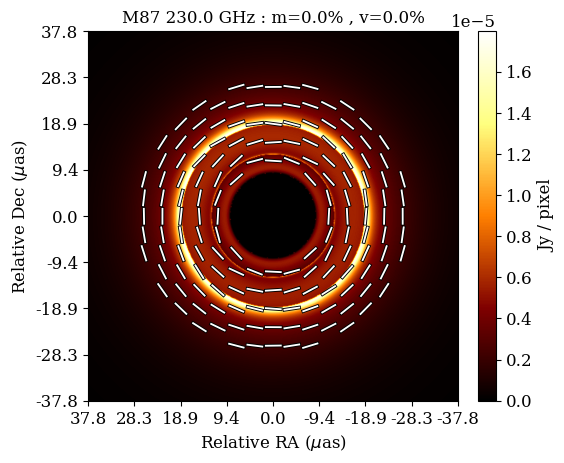

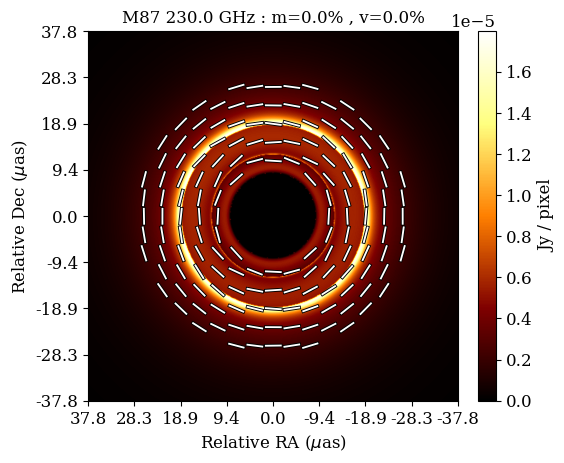

In [12]:
#display
im_total.display(plotp=True)